# Uppgift 1 – Data Science, PYAI 2022

Namn: Per Anebert

## Sammanfattning
Syftet var att välja ett dataset inom ett område som man har intressea av, vilket jag i början uppfattade gjorde och att jag hade valt rätt. Efter ett tag med arbetet förstod jag att jag skulle lagt ner mer tid på att välja rätt dataset som var mer i linje med vad jag försökte uppnå - eller att jag saknade erfarenhet att välja ett bra dataset, vilket var lite överraskande - . 
Jag uppfattar datasetet som begränsat och att det behöver kompletteras med t ex kolumner som kommentartext, videospeltid eller främst tidspersektivet. Tidsperpektivet hade varit värdefullt och jag antar att det skapas genom flera dagliga nedladdningar av datasetet. Bl a är kolumnen "viewcount" en summering av samtliga visningar dvs täcker flera dagar vilket gör att man inte kan avgöra när det har varit mycket visningar. Istället har man ett begrepp "trending_date"(kolumn), som är svår att förstå definition på.
- Notera att jag ser det som ett pågående arbete som inte är avslutat :)

## Introduktion

### Dataset
Ett Youtubetrend video dataset som finns på Kaggle och updateras dagligen.

Datasetets hemsida:
[https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset](https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset)

Datasetet består av två filler, en csv fil med primär data och en json fil kategori data. Olika länder är representerade(se länken), dock finns inte Sverige med. Jag har valt det engelska datasetet(GB).

### Val av dataset
Eftersom vi spenderar mycket av vår tid på Youtube så ville jag öka mina kunskaper och insikter om videotrender. Ambitionen är att försöka belysa olika perspektiv, hitta samband i datasetet och förhoppningsvis dra några preliminära insiktsfulla antaganden eller slutsatser.
Begränsingar: Datasetet updateras dagligen och har t ex. inget tidsperspektiv därför blir frågeställningarna begränsade till dagens data. Man kan dock med mängden data  anta att slutsatser även gäller över en begränsad närtid.

## Uppgift
Enligt Uppgift: "Uppgift-1-nov-22.pdf"

### Du skall sedan utföra följande moment:
	1. Skapa en Jupyter notebook, samt skapa ett virtuell environement och aktivera det. Installerade paket du behöver (kan även köras efter hand, vid behov) med pip install. Förslagsvis börjar du med Pandas.
	2. Studera ditt valda dataset och försök att förstå vad de olika kolumnerna representerar.
	3. Vilka kolumner kommer du vara intresserad av? Ta bort de kolumner som du inte behöver.
	4. Undersök vilka datatyper kolumnerna har. Är de i en datatyp som känns rimlig?
	5. Har datat rätt format? Är exempelvis flyttal beskrivna med decimalpunkt? Om inte måstepunkterna bytas ut och kolumnen konverteras till rätt typ.
	6. Har alla rader värden, eller finns det null-värden? Om det gör det hur skall dessa hanteras? Raderas, använda medel eller någon annan metod. Det som får avgöra här är vad kolumnens data skall användas till.
	7. Kan du hitta samband mellan olika kolumner? Vad säger dem dig?
	8. Ställ dig frågor av typen ”Är mitt data komplett, eller är det bara ett litet urval?”, ”Är datasetet begränsat över tid (alltså exempelvis bara prisuppgifter fram till 2015)? Kan jag fylla på med mer data från någon källa?”
	9. Vilka korrelationer mellan kolumner kan du se i ditt data? Är alla korrelationer förväntade. Om inte, vilka teorier har du angående dessa korrelationer. Finns det inga synliga korrelationer? Vad kan vi dra för slutsatser om det?
	10.   Vilka slutsatser kan du dra av ditt data? Dokumentera med markdown-celler och visualisera med diagram dina slutsatser.
	11.   Dokumentera även beslut du gör (som exempelvis radera kolumner eller hantering av nullvärden) i markdown i din notebook.

**(Momenten 1-11 relateras med en markering, ex. (M5) i md-texten)**

### Vad kan vara intressant att undersöka

Vilka samband kan man anta 	
	- att det råder samband mellan trender och vissa kategorier
	- tags relaterade till trender?
	- intressant att veta om det finns någon generell tid, hur lång tid det tar innan en video trendar.

Kolumner av intresse och ointressanta? Se anteckningar i koden.(M11)
	
Hur ska man göra med saknade värden NaN? Se anteckningar i koden.(M6)


### Kolumnförklaringar(M2, M3)

Datasetet består av två filer:
    - GB_youtube_trening_data.csv
    - GB_category_id.json
  
#### Fil: dataset csv-format
| Kolumn | Beskrivning | 
| ----------- | ----------- |
| video_id | Videoidentitet(slumpmässig bokstavskombination) |
|title | Videotitel |
|publishedAt| Publiseringsdatum(2020-08-11T16:34:06Z) |
|channelId | Kanalidentitet(slumpmässig bokstavskombination) |
|channelTitle | Kanaltitel |
|categoryId | Kategoriidentitetnummer(i datasetet ingår json-fil som beskriver kategorin. Se nedan) |
|trending_date | Datum för trend(2020-08-12T00:00:00Z) |
|tags | Tags till video |
|view_count | Antal visningar |
|likes | Antal ”likes” |
|dislikes | Antal ”dislikes” |
|comment_count | Antal kommentarer |
|thumbnail_link | Thumbnail-länk |
|comments_disabled | Kommentarer tillgänglig |
|ratings_disabled | Ranking tillgänglig |
|description | Videobeskrivningstext |

#### Fil: kategorier json-format

Ex.

```json
"items": [
        {
            "kind": "youtube#videoCategory",
            "etag": "IfWa37JGcqZs-jZeAyFGkbeh6bc",
            "id": "1",
            "snippet": {
                "title": "Film & Animation",
                "assignable": true,
                "channelId": "UCBR8-60-B28hp2BmDPdntcQ"
            }
        }
]
```
##### Användbara fält(M3):

    - items.id: Kategoriidentitet
	- items.snippet.title: Titel
	- items.snippet.assignable: (Kategori tillgänglig. Valbar för användaren. Om false, förekommer inte kategorin i datasetet)

övriga fält är utanför vår domain.


---

### Inläsning av dataset(M2, M8)
Bekantar mig med datasetet med diverse kommandon.
Begränsingar: Datasetet updateras dagligen och har t ex. inget tidsperspektiv över flera dagar eller veckor, därför blir frågeställningarna begränsade till dagens inkommande data. Man kan dock med mängden data anta att slutsatser även gäller över en begränsad närtid. Särskilt om vi t ex hittar en kategori som är frekvent och har genomslagskraft.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

#Loading dataset
df1 = pd.read_csv('./archive/GB_youtube_trending_data.csv')

# json_data = json.loads(./archive/GB_category_id.json)
#Primary check that you can write data
df1.head(10)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353790,2628,40228,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
1,9nidKH8cM38,TAXI CAB SLAYER KILLS 'TO KNOW HOW IT FEELS',2020-08-11T20:00:45Z,UCFMbX7frWZfuWdjAML0babA,Eleanor Neale,27,2020-08-12T00:00:00Z,eleanor|neale|eleanor neale|eleanor neale true...,236830,16423,209,1642,https://i.ytimg.com/vi/9nidKH8cM38/default.jpg,False,False,The first 1000 people to click the link will g...
2,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
3,kgUV1MaD_M8,Nines - Clout (Official Video),2020-08-10T18:30:28Z,UCvDkzrj8ZPlBqRd6fIxdhTw,Nines,24,2020-08-12T00:00:00Z,Nines|Trapper of the year|Crop Circle|Nines Tr...,613785,37567,669,2101,https://i.ytimg.com/vi/kgUV1MaD_M8/default.jpg,False,False,Nines - Clout (Official Video)Listen to Clout ...
4,49Z6Mv4_WCA,i don't know what im doing anymore,2020-08-11T20:24:34Z,UCtinbF-Q-fVthA0qrFQTgXQ,CaseyNeistat,22,2020-08-12T00:00:00Z,[None],940036,87113,1860,7052,https://i.ytimg.com/vi/49Z6Mv4_WCA/default.jpg,False,False,ssend love to my sponsor; for a super Limited ...
5,ua4QMFQATco,CGP Grey was WRONG,2020-08-11T17:15:11Z,UC2C_jShtL725hvbm1arSV9w,CGP Grey,27,2020-08-12T00:00:00Z,cgpgrey|education|hello internet,1050143,89192,855,6455,https://i.ytimg.com/vi/ua4QMFQATco/default.jpg,False,False,‣ What Was TEKOI: https://www.youtube.com/watc...
6,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655449,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
7,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156910,5856,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
8,ZNfeMbO_AHo,Popek ft. Dr Alban - It's My Life (prod. Clay...,2020-08-12T10:00:09Z,UC8Mh9UmrIaQPEcybdWvQsOg,KrólAlbaniiTV,24,2020-08-12T00:00:00Z,[None],277506,27420,617,1268,https://i.ytimg.com/vi/ZNfeMbO_AHo/default.jpg,False,False,Nowa wersja kultowego utworu z lat 90’.Posłuch...
9,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45803,964,2198,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [2]:
#Tail looks good as well
df1.tail(10)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
165383,27i8B_nZgzc,MINIMINTER REACTS TO GUESS THE RAPPER FT STORMZY,2022-11-03T15:00:01Z,UCzfVmyl18x2TTaWp0d5rBNQ,MiniminterClips,20,2022-11-12T00:00:00Z,miniminter|mm7games|miniminterclips|simon|side...,447379,18048,0,430,https://i.ytimg.com/vi/27i8B_nZgzc/default.jpg,False,False,@Beta Squad Original Video: https://www.youtub...
165384,nmgFG7PUHfo,The Most Important Algorithm Of All Time,2022-11-03T12:52:34Z,UCHnyfMqiRRG1u-2MsSQLbXA,Veritasium,27,2022-11-12T00:00:00Z,veritasium|science|physics,3781702,173896,0,8216,https://i.ytimg.com/vi/nmgFG7PUHfo/default.jpg,False,False,The Fast Fourier Transform is used everywhere ...
165385,b-UsFrol25Y,Major Distribution,2022-11-04T04:02:33Z,UCU6cE7pdJPc6DU2jSrKEsdQ,Drake - Topic,10,2022-11-12T00:00:00Z,Drake|ドレイク|21 Savage|トゥエンティワンサベージ|21サヴェージ|Her ...,4368144,87279,0,0,https://i.ytimg.com/vi/b-UsFrol25Y/default.jpg,False,False,Provided to YouTube by Universal Music GroupMa...
165386,MIyXkbMSYHM,Chinx(OS) x Hazey x Sava(OTP) x Mitch x Countr...,2022-11-03T20:00:09Z,UCMlHf6251NKQM-qkS2pgYQg,Mixtape Madness,10,2022-11-12T00:00:00Z,mixtape madness|mad about mixtapes|drill|grime...,645558,10678,0,3400,https://i.ytimg.com/vi/MIyXkbMSYHM/default.jpg,False,False,Follow Fumez The Engineer Twitter - FumezEngin...
165387,O6amFOAjkTw,£1000 CAR + CARAVAN ADVENTURE!,2022-11-03T17:46:39Z,UCqWFLuBLPiaeNzYAek6BOmA,Autoalex Cars,2,2022-11-12T00:00:00Z,[None],333173,16872,0,1297,https://i.ytimg.com/vi/O6amFOAjkTw/default.jpg,False,False,Get 10% off Car Vertical using code Autoalex! ...
165388,GBp_NgrrtPM,China’s Electricity Problem,2022-11-03T15:08:42Z,UC9RM-iSvTu1uPJb8X5yp3EQ,Wendover Productions,27,2022-11-12T00:00:00Z,[None],1492264,49111,0,3898,https://i.ytimg.com/vi/GBp_NgrrtPM/default.jpg,False,False,For 70% off with HelloFresh plus FREE shipping...
165389,rjDBd16pBLg,She-Hulk Pitch Meeting,2022-11-03T21:15:08Z,UC9Kq-yEt1iYsbUzNOoIRK0g,Pitch Meeting,24,2022-11-12T00:00:00Z,She-hulk|attorney at law|avengers|bruce banner...,1571579,130235,0,12531,https://i.ytimg.com/vi/rjDBd16pBLg/default.jpg,False,False,Step inside the Pitch Meeting that led to She-...
165390,TW98pGSTvM0,Selena Gomez - My Mind & Me (Official Lyric Vi...,2022-11-03T12:00:06Z,UCjK8ORC71kwyj1DWFwril_A,SelenaGomezVEVO,10,2022-11-12T00:00:00Z,Mind|(Lyric|Video)|Interscope|Records|Pop|#Mad...,6083208,418252,0,14696,https://i.ytimg.com/vi/TW98pGSTvM0/default.jpg,False,False,Official lyric video for “My Mind & Me” by Sel...
165391,_COM7zsoh3w,Hyundai Ioniq 6: The Perfect Electric Car?,2022-11-03T17:00:20Z,UCzz4CoEgSgWNs9ZAvRMhW2A,Fully Charged Show,2,2022-11-12T00:00:00Z,electric car youtube channel|why should i buy ...,493795,11099,0,1995,https://i.ytimg.com/vi/_COM7zsoh3w/default.jpg,False,False,Jack heads to South Korea to spend some time w...
165392,OHAGO5e8nBo,Big Pu**y - BROCKHAMPTON,2022-11-04T04:00:08Z,UCFLnwFhuJeBSCjIJewxSqKw,BROCKHAMPTON,10,2022-11-12T00:00:00Z,Kevin abstract|brockhampton new music|brockham...,776521,34838,0,1699,https://i.ytimg.com/vi/OHAGO5e8nBo/default.jpg,False,False,from BROCKHAMPTON’S ‘the family’ - the final a...


In [16]:
df1.head(10).sort_values(['likes'], ascending=False)
# plt.pie([likes, dislikes])


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
6,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655449,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
0,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353790,2628,40228,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
7,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156910,5856,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
2,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
5,ua4QMFQATco,CGP Grey was WRONG,2020-08-11T17:15:11Z,UC2C_jShtL725hvbm1arSV9w,CGP Grey,27,2020-08-12T00:00:00Z,cgpgrey|education|hello internet,1050143,89192,855,6455,https://i.ytimg.com/vi/ua4QMFQATco/default.jpg,False,False,‣ What Was TEKOI: https://www.youtube.com/watc...
4,49Z6Mv4_WCA,i don't know what im doing anymore,2020-08-11T20:24:34Z,UCtinbF-Q-fVthA0qrFQTgXQ,CaseyNeistat,22,2020-08-12T00:00:00Z,[None],940036,87113,1860,7052,https://i.ytimg.com/vi/49Z6Mv4_WCA/default.jpg,False,False,ssend love to my sponsor; for a super Limited ...
9,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45803,964,2198,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...
3,kgUV1MaD_M8,Nines - Clout (Official Video),2020-08-10T18:30:28Z,UCvDkzrj8ZPlBqRd6fIxdhTw,Nines,24,2020-08-12T00:00:00Z,Nines|Trapper of the year|Crop Circle|Nines Tr...,613785,37567,669,2101,https://i.ytimg.com/vi/kgUV1MaD_M8/default.jpg,False,False,Nines - Clout (Official Video)Listen to Clout ...
8,ZNfeMbO_AHo,Popek ft. Dr Alban - It's My Life (prod. Clay...,2020-08-12T10:00:09Z,UC8Mh9UmrIaQPEcybdWvQsOg,KrólAlbaniiTV,24,2020-08-12T00:00:00Z,[None],277506,27420,617,1268,https://i.ytimg.com/vi/ZNfeMbO_AHo/default.jpg,False,False,Nowa wersja kultowego utworu z lat 90’.Posłuch...
1,9nidKH8cM38,TAXI CAB SLAYER KILLS 'TO KNOW HOW IT FEELS',2020-08-11T20:00:45Z,UCFMbX7frWZfuWdjAML0babA,Eleanor Neale,27,2020-08-12T00:00:00Z,eleanor|neale|eleanor neale|eleanor neale true...,236830,16423,209,1642,https://i.ytimg.com/vi/9nidKH8cM38/default.jpg,False,False,The first 1000 people to click the link will g...


In [40]:
df2 = df1[df1['tags'] != '[None]']
df2.drop(columns=['video_id', 'channelId', 'thumbnail_link'])
df3 = df2.view_count >= 180000000
df3.head()
# df2[df3].categoryId
df2.loc[df3, 'categoryId']

2454      10
2699      10
2953      10
68533     24
68781     24
149525    10
149747    10
149977    10
Name: categoryId, dtype: int64

### Datatyper och värden(M4, M5, M11)
- Datatyperna är användbara främst object-strings, int64 och booleans.
- Inga flyttal och behöver därför inte ersätta punkt med komma.
- Samtliga kolumner har värden, inga NaN.
- Med info()-kommandot får vi också reda på antalet rader och filstorlek. Bra att lägga på minnet om vi börjar ändra på datasetet

In [44]:
# Looking for datatypes and NaN. Clean!
"Memory size, more that 18MB "
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165393 entries, 0 to 165392
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           165393 non-null  object
 1   title              165393 non-null  object
 2   publishedAt        165393 non-null  object
 3   channelId          165393 non-null  object
 4   channelTitle       165393 non-null  object
 5   categoryId         165393 non-null  int64 
 6   trending_date      165393 non-null  object
 7   tags               165393 non-null  object
 8   view_count         165393 non-null  int64 
 9   likes              165393 non-null  int64 
 10  dislikes           165393 non-null  int64 
 11  comment_count      165393 non-null  int64 
 12  thumbnail_link     165393 non-null  object
 13  comments_disabled  165393 non-null  bool  
 14  ratings_disabled   165393 non-null  bool  
 15  description        161539 non-null  object
dtypes: bool(2), int64(5)

### Avsaknaden av värden(M11)
Enligt isnull() och isna() kommandona så har endast descriptionkolumnen null-värden. Antalet rader med null-värden är 3854(2,3%) vilket är försumbart i förhållande till 165393, vilket är hela datasetets antalet rader. Raderna kan därmed raderas eftersom de inte påverkar något resultat.


In [6]:
# df1.isna().sum()
df1.isnull().sum()


video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          3854
dtype: int64

In [26]:
# Rows with description column with nulls
# df1[df1['description'].isnull()]
df1[df1['description'].isna()]


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
95,k2MgZYSo5CU,Selfish Karen Feels My WRATH,2020-08-10T16:25:09Z,UCdYBCyFyww-1mxvylJsIZOA,Callums Corner,22,2020-08-12T00:00:00Z,Karen|callums corner,45959,5952,70,831,https://i.ytimg.com/vi/k2MgZYSo5CU/default.jpg,False,False,NaN
100,dypqOxCVJas,I ONLY ATE FOODS I HAVE NEVER TRIED BEFORE FOR...,2020-08-09T16:02:28Z,UC_2mX7SbHCRswNOA_6cH6RA,Jed Barker,22,2020-08-12T00:00:00Z,[None],182627,13164,190,517,https://i.ytimg.com/vi/dypqOxCVJas/default.jpg,False,False,NaN
200,ixi8XOCWoFA,OPENING MY A-LEVEL RESULTS 2020,2020-08-13T08:06:04Z,UC87zlTibXRY2_L5zdOeRDLw,Fleur Roberts,24,2020-08-13T00:00:00Z,[None],26216,2201,182,233,https://i.ytimg.com/vi/ixi8XOCWoFA/default.jpg,False,False,NaN
226,NSuaUok-wTY,[1147] Locksmith Says My Videos Are BS... Lose...,2020-08-12T13:00:12Z,UCm9K6rby98W8JigLoZOh6FQ,LockPickingLawyer,27,2020-08-13T00:00:00Z,Lock|picking,422963,62940,168,7301,https://i.ytimg.com/vi/NSuaUok-wTY/default.jpg,False,False,NaN
322,k2MgZYSo5CU,Selfish Karen Feels My WRATH,2020-08-10T16:25:09Z,UCdYBCyFyww-1mxvylJsIZOA,Callums Corner,22,2020-08-13T00:00:00Z,Karen|callums corner,52837,6450,89,879,https://i.ytimg.com/vi/k2MgZYSo5CU/default.jpg,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165043,lIMxvnUp-uY,A little update..,2022-11-08T17:05:10Z,UC8_ESAUsL0xXWNPHdHZDsqA,Imogenation,24,2022-11-11T00:00:00Z,[None],80726,2121,0,288,https://i.ytimg.com/vi/lIMxvnUp-uY/default.jpg,False,False,NaN
165148,L_BV27L2a5k,Fredo - I'm Back (Official Video),2022-11-03T19:00:04Z,UChCu7JmWByOod4xdH7IVJ_g,FREDOPG,10,2022-11-11T00:00:00Z,[None],1631993,56953,0,3037,https://i.ytimg.com/vi/L_BV27L2a5k/default.jpg,False,False,NaN
165220,QE4UIWb440U,"Trying COSTA CHRISTMAS MENU..also, taking a so...",2022-11-10T19:10:31Z,UCV3uKTAAQi9qy5TwY6uZgGQ,Mark Ferris,23,2022-11-12T00:00:00Z,christmas|christmas menu|costa|mark ferris,39155,2484,0,137,https://i.ytimg.com/vi/QE4UIWb440U/default.jpg,False,False,NaN
165259,lIMxvnUp-uY,A little update..,2022-11-08T17:05:10Z,UC8_ESAUsL0xXWNPHdHZDsqA,Imogenation,24,2022-11-12T00:00:00Z,[None],82082,2161,0,289,https://i.ytimg.com/vi/lIMxvnUp-uY/default.jpg,False,False,NaN


### Borttagning av [None]
Kolumnerna tags och description innehåller båda strängen '[None]' vilket inte är en NaN, Not a Number.
Borttagning med nedanstånde kommando och resultat sparat i objectet df_clean.

In [40]:
df_clean = df1[(df1['description'] != '[None]') & (df1['tags'] != '[None]')]
df_clean

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353790,2628,40228,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
1,9nidKH8cM38,TAXI CAB SLAYER KILLS 'TO KNOW HOW IT FEELS',2020-08-11T20:00:45Z,UCFMbX7frWZfuWdjAML0babA,Eleanor Neale,27,2020-08-12T00:00:00Z,eleanor|neale|eleanor neale|eleanor neale true...,236830,16423,209,1642,https://i.ytimg.com/vi/9nidKH8cM38/default.jpg,False,False,The first 1000 people to click the link will g...
2,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
3,kgUV1MaD_M8,Nines - Clout (Official Video),2020-08-10T18:30:28Z,UCvDkzrj8ZPlBqRd6fIxdhTw,Nines,24,2020-08-12T00:00:00Z,Nines|Trapper of the year|Crop Circle|Nines Tr...,613785,37567,669,2101,https://i.ytimg.com/vi/kgUV1MaD_M8/default.jpg,False,False,Nines - Clout (Official Video)Listen to Clout ...
5,ua4QMFQATco,CGP Grey was WRONG,2020-08-11T17:15:11Z,UC2C_jShtL725hvbm1arSV9w,CGP Grey,27,2020-08-12T00:00:00Z,cgpgrey|education|hello internet,1050143,89192,855,6455,https://i.ytimg.com/vi/ua4QMFQATco/default.jpg,False,False,‣ What Was TEKOI: https://www.youtube.com/watc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165386,MIyXkbMSYHM,Chinx(OS) x Hazey x Sava(OTP) x Mitch x Countr...,2022-11-03T20:00:09Z,UCMlHf6251NKQM-qkS2pgYQg,Mixtape Madness,10,2022-11-12T00:00:00Z,mixtape madness|mad about mixtapes|drill|grime...,645558,10678,0,3400,https://i.ytimg.com/vi/MIyXkbMSYHM/default.jpg,False,False,Follow Fumez The Engineer Twitter - FumezEngin...
165389,rjDBd16pBLg,She-Hulk Pitch Meeting,2022-11-03T21:15:08Z,UC9Kq-yEt1iYsbUzNOoIRK0g,Pitch Meeting,24,2022-11-12T00:00:00Z,She-hulk|attorney at law|avengers|bruce banner...,1571579,130235,0,12531,https://i.ytimg.com/vi/rjDBd16pBLg/default.jpg,False,False,Step inside the Pitch Meeting that led to She-...
165390,TW98pGSTvM0,Selena Gomez - My Mind & Me (Official Lyric Vi...,2022-11-03T12:00:06Z,UCjK8ORC71kwyj1DWFwril_A,SelenaGomezVEVO,10,2022-11-12T00:00:00Z,Mind|(Lyric|Video)|Interscope|Records|Pop|#Mad...,6083208,418252,0,14696,https://i.ytimg.com/vi/TW98pGSTvM0/default.jpg,False,False,Official lyric video for “My Mind & Me” by Sel...
165391,_COM7zsoh3w,Hyundai Ioniq 6: The Perfect Electric Car?,2022-11-03T17:00:20Z,UCzz4CoEgSgWNs9ZAvRMhW2A,Fully Charged Show,2,2022-11-12T00:00:00Z,electric car youtube channel|why should i buy ...,493795,11099,0,1995,https://i.ytimg.com/vi/_COM7zsoh3w/default.jpg,False,False,Jack heads to South Korea to spend some time w...


### Användara rader
Har inte minimerat antalet användbara kolumner för att jag vill kunna se så mycket som möjligt.
Vill jag ta bort kolumner så är det enkelt att göra det i serien.


In [39]:
# Only showing usable raws.
df_usable_raws = df_clean[['title', 'publishedAt', 'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled', 'description']]
df_usable_raws


,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
0,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353790,2628,40228,False,False,I left youtube for a month and this is what ha...
1,TAXI CAB SLAYER KILLS 'TO KNOW HOW IT FEELS',2020-08-11T20:00:45Z,Eleanor Neale,27,2020-08-12T00:00:00Z,eleanor|neale|eleanor neale|eleanor neale true...,236830,16423,209,1642,False,False,The first 1000 people to click the link will g...
2,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare..."
3,Nines - Clout (Official Video),2020-08-10T18:30:28Z,Nines,24,2020-08-12T00:00:00Z,Nines|Trapper of the year|Crop Circle|Nines Tr...,613785,37567,669,2101,False,False,Nines - Clout (Official Video)Listen to Clout ...
5,CGP Grey was WRONG,2020-08-11T17:15:11Z,CGP Grey,27,2020-08-12T00:00:00Z,cgpgrey|education|hello internet,1050143,89192,855,6455,False,False,‣ What Was TEKOI: https://www.youtube.com/watc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165386,Chinx(OS) x Hazey x Sava(OTP) x Mitch x Countr...,2022-11-03T20:00:09Z,Mixtape Madness,10,2022-11-12T00:00:00Z,mixtape madness|mad about mixtapes|drill|grime...,645558,10678,0,3400,False,False,Follow Fumez The Engineer Twitter - FumezEngin...
165389,She-Hulk Pitch Meeting,2022-11-03T21:15:08Z,Pitch Meeting,24,2022-11-12T00:00:00Z,She-hulk|attorney at law|avengers|bruce banner...,1571579,130235,0,12531,False,False,Step inside the Pitch Meeting that led to She-...
165390,Selena Gomez - My Mind & Me (Official Lyric Vi...,2022-11-03T12:00:06Z,SelenaGomezVEVO,10,2022-11-12T00:00:00Z,Mind|(Lyric|Video)|Interscope|Records|Pop|#Mad...,6083208,418252,0,14696,False,False,Official lyric video for “My Mind & Me” by Sel...
165391,Hyundai Ioniq 6: The Perfect Electric Car?,2022-11-03T17:00:20Z,Fully Charged Show,2,2022-11-12T00:00:00Z,electric car youtube channel|why should i buy ...,493795,11099,0,1995,False,False,Jack heads to South Korea to spend some time w...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

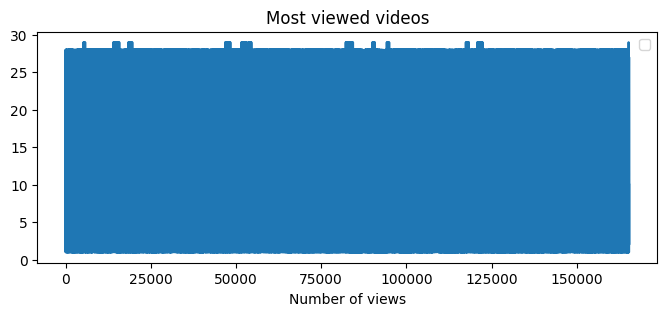

In [10]:
# df2 = df1[df1['tags'] == '[None]']
df1_sorted = df1.sort_values(['view_count'], ascending=False).head(10)
plt.figure(figsize=(8,3))
plt.title('Most viewed videos')
plt.plot(df1_sorted.view_count, df1.categoryId)
# for categoryId in df1:
#     plt.plot(df1.view_count, df1[categoryId])
plt.xlabel('Number of views')
plt.legend()
plt.show

In [11]:
plt.hist(df1.tags)
plt.show()

/Users/per/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51080 (\N{HANGUL SYLLABLE ISS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/per/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/per/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/per/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/per/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  fig.c

ValueError: 
buzzfeed|buzzfeedvideo|buzzfeed video|Worth It|BuzzFeed Worth It|BuzzFeed Steven|BuzzFeed Adam|BuzzFeed Andrew|Steven Lim|Adam Bianchi|Cameraguy|andrew ilnyckyi|Food|Travel|Cheap vs. expensive|Lifestyle|BuzzFeed|BuzzFeedvideo|Experience|cheap vs expensive food|cheap vs expensive rice|best rice in LA|best rice dishes|PL-WorthIt-S8|food|taste test|expensive|cheap food|$ vs $$$|andrew ilnyckyj|foodies|food review|high vs low|expensive food|PL-WorthIt
                                                                                                                                                                                                                                                                                                                                                                                       ^
Expected end of text, found '$'  (at char 375), (line:1, col:376)

<Figure size 640x480 with 1 Axes>

In [105]:
df1.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

In [100]:
df1.shape

(165393, 16)

In [103]:
# Droping raws in description with null-values. Obs! we have only null value in one column.
# Otherwise it had located other null-values in other columns as well. And removed them.
df1.dropna(how = 'any').shape

(161539, 16)

In [104]:
# Droping raws in description with null-values.
df1.dropna(how='all').shape


(165393, 16)

In [65]:
#Check raw size and number of colomns
df1.shape

(165393, 16)

### Pågående arbete, nedan!!!
### Jag inser att det finns mer att göra och utforska.
### Jag fortsätter att arbeta vidare och ev. lägga till mer dataset för att komma fram till ett bättre resultat.
### Nyttig erfarenhet!

In [42]:
import pip, sys
print(sys.version)


3.10.6 (main, Aug 30 2022, 05:12:36) [Clang 13.1.6 (clang-1316.0.21.2.5)]


In [64]:
df1['categoryId'].tail(50)

165343    24
165344    20
165345    22
165346    17
165347    23
165348    24
165349    20
165350    17
165351    22
165352    17
165353    20
165354    24
165355    24
165356    17
165357    17
165358     1
165359    20
165360    17
165361    20
165362    10
165363    10
165364    10
165365    22
165366    20
165367    10
165368    10
165369    24
165370    23
165371    17
165372    10
165373    20
165374    10
165375    24
165376    20
165377    20
165378    24
165379    17
165380    20
165381    10
165382    24
165383    20
165384    27
165385    10
165386    10
165387     2
165388    27
165389    24
165390    10
165391     2
165392    10
Name: categoryId, dtype: int64

In [24]:
df1['title'].head(15)


0     I left youtube for a month and THIS is what ha...
1          TAXI CAB SLAYER KILLS 'TO KNOW HOW IT FEELS'
2     Apex Legends | Stories from the Outlands – “Th...
3                        Nines - Clout (Official Video)
4                    i don't know what im doing anymore
5                                    CGP Grey was WRONG
6     Kya Baat Aa : Karan Aujla (Official Video) Tan...
7                    I ASKED HER TO BE MY GIRLFRIEND...
8     Popek ft. Dr Alban - It's My Life  (prod. Clay...
9     Ultimate DIY Home Movie Theater for The LaBran...
10    Champions League preview: Messi v Boateng part...
11                          Sensible Transfers: Arsenal
12          I've Seen Something KSI Hasn't Shown You...
13                            FUT 21 | Official Trailer
14    'Seattle has made a tragic mistake': Trump rea...
Name: title, dtype: object

In [53]:
print(df1.iloc[1,1])


TAXI CAB SLAYER KILLS 'TO KNOW HOW IT FEELS'


In [58]:
print(df1.iloc[0])


video_id                                                   J78aPJ3VyNs
title                I left youtube for a month and THIS is what ha...
publishedAt                                       2020-08-11T16:34:06Z
channelId                                     UCYzPXprvl5Y-Sf0g4vX-m6g
channelTitle                                             jacksepticeye
categoryId                                                          24
trending_date                                     2020-08-12T00:00:00Z
tags                 jacksepticeye|funny|funny meme|memes|jacksepti...
view_count                                                     2038853
likes                                                           353790
dislikes                                                          2628
comment_count                                                    40228
thumbnail_link          https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg
comments_disabled                                                False
rating

In [41]:
print(df1.iloc[0:4])


      video_id                                              title  \
0  J78aPJ3VyNs  I left youtube for a month and THIS is what ha...   
1  9nidKH8cM38       TAXI CAB SLAYER KILLS 'TO KNOW HOW IT FEELS'   
2  M9Pmf9AB4Mo  Apex Legends | Stories from the Outlands – “Th...   
3  kgUV1MaD_M8                     Nines - Clout (Official Video)   

            publishedAt                 channelId   channelTitle  categoryId  \
0  2020-08-11T16:34:06Z  UCYzPXprvl5Y-Sf0g4vX-m6g  jacksepticeye          24   
1  2020-08-11T20:00:45Z  UCFMbX7frWZfuWdjAML0babA  Eleanor Neale          27   
2  2020-08-11T17:00:10Z  UC0ZV6M2THA81QT9hrVWJG3A   Apex Legends          20   
3  2020-08-10T18:30:28Z  UCvDkzrj8ZPlBqRd6fIxdhTw          Nines          24   

          trending_date                                               tags  \
0  2020-08-12T00:00:00Z  jacksepticeye|funny|funny meme|memes|jacksepti...   
1  2020-08-12T00:00:00Z  eleanor|neale|eleanor neale|eleanor neale true...   
2  2020-08-12T00:00

### Biblioteksproblem i Jupyter(M1)
Vid installation av bibliotek Pandas i Jupyter som körs i VS Code. Installera direkt i Jupyter med !pip om inte det fungerar så använd %pip för att åtgärda problemet. Annars installeras biblioteken under en annnan Python installation på din dator.

In [138]:
# A reminder of a problem when installing libraries for working in Jupyter in VS Code. If not !pip is working try %pip(M1).
!pip install numpy
%pip install pandas
%pip install --upgrade pip
%pip install Matplotlib


zsh:1: command not found: pip

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 9.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 4.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 10.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 4.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.1 MB/s eta 0:00:00ta 0:00:01

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [139]:
%pip install --upgrade pip

  Using cached pip-22.3.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.2.2
    Uninstalling pip-22.2.2:
      Successfully uninstalled pip-22.2.2
Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install Matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install pandas


Note: you may need to restart the kernel to use updated packages.
